In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import skew


In [13]:
#load dataset
df =pd.read_csv("digital_marketing_campaign_dataset.csv")
df.head()


,CustomerID,Age,Gender,Income,CampaignChannel,CampaignType,AdSpend,ClickThroughRate,ConversionRate,WebsiteVisits,PagesPerVisit,TimeOnSite,SocialShares,EmailOpens,EmailClicks,PreviousPurchases,LoyaltyPoints,AdvertisingPlatform,AdvertisingTool,Conversion
0,8000,56,Female,136912,Social Media,Awareness,6497.870068,0.043919,0.088031,0,2.399017,7.396803,19,6,9,4,688,IsConfid,ToolConfid,1
1,8001,69,Male,41760,Email,Retention,3898.668606,0.155725,0.182725,42,2.917138,5.352549,5,2,7,2,3459,IsConfid,ToolConfid,1
2,8002,46,Female,88456,PPC,Awareness,1546.429596,0.277490,0.076423,2,8.223619,13.794901,0,11,2,8,2337,IsConfid,ToolConfid,1
3,8003,32,Female,44085,PPC,Conversion,539.525936,0.137611,0.088004,47,4.540939,14.688363,89,2,2,0,2463,IsConfid,ToolConfid,1
4,8004,60,Female,83964,PPC,Conversion,1678.043573,0.252851,0.109940,0,2.046847,13.993370,6,6,6,8,4345,IsConfid,ToolConfid,1


In [14]:
# 1. Calculate Average Spending per Customer
average_spending = df['AdSpend'].mean()
print(f"Average spending per customer: {average_spending:.2f}")

Average spending per customer: 5000.94


In [15]:
# 2. Identify Top 10% of Spenders
threshold = df['AdSpend'].quantile(0.90)
top_10_percent_spenders = df[df['AdSpend'] >= threshold]

In [16]:
print(f"\nTop 10% spending threshold: {threshold:.2f}")
print("Top 10% of spenders:")
print(top_10_percent_spenders[['CustomerID', 'AdSpend']])


Top 10% spending threshold: 8962.03
Top 10% of spenders:
      CustomerID      AdSpend
5           8005  9579.388247
8           8008  9421.250951
25          8025  9229.345319
34          8034  9419.674375
38          8038  9435.204948
...          ...          ...
7947       15947  9893.444595
7964       15964  9860.547470
7968       15968  8988.733155
7982       15982  9935.375535
7998       15998  9476.106354

[800 rows x 2 columns]


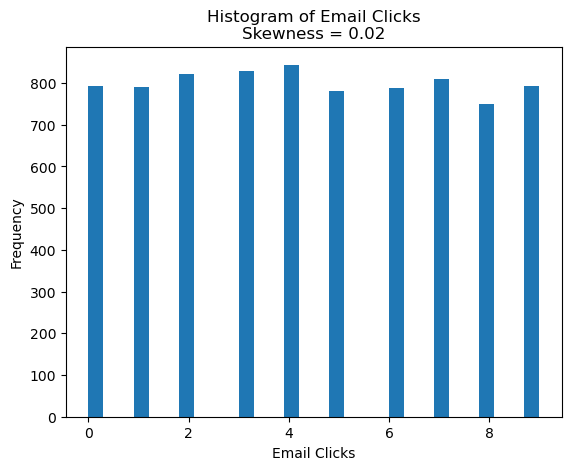

Skewness of EmailClicks: 0.02


In [28]:
# Select EmailClicks as engagement metric
email_clicks = df['EmailClicks']

# Calculate skewness
email_clicks_skew = skew(email_clicks)

# Plot histogram
plt.figure()
plt.hist(email_clicks, bins=30)
plt.xlabel("Email Clicks")
plt.ylabel("Frequency")
plt.title(f"Histogram of Email Clicks\nSkewness = {email_clicks_skew:.2f}")
plt.show()

# Print skewness value
print(f"Skewness of EmailClicks: {email_clicks_skew:.2f}")

In [18]:
website_visits = df['WebsiteVisits']
website_skew = skew(website_visits)

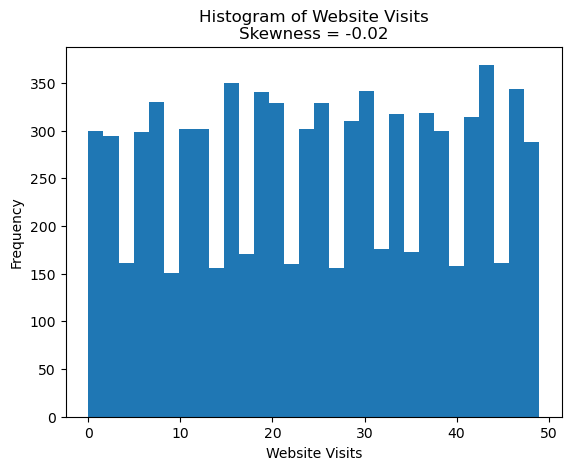

In [19]:

plt.figure()
plt.hist(website_visits, bins=30)
plt.xlabel("Website Visits")
plt.ylabel("Frequency")
plt.title(f"Histogram of Website Visits\nSkewness = {website_skew:.2f}")
plt.show()


In [20]:
time_on_site = df['TimeOnSite']
time_skew = skew(time_on_site)

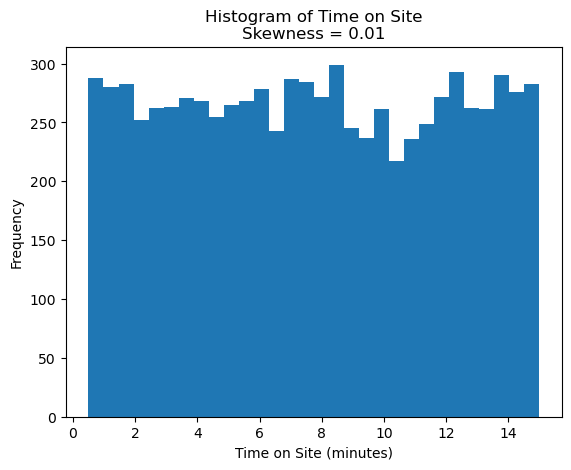

In [21]:
plt.figure()
plt.hist(time_on_site, bins=30)
plt.xlabel("Time on Site (minutes)")
plt.ylabel("Frequency")
plt.title(f"Histogram of Time on Site\nSkewness = {time_skew:.2f}")
plt.show()